In [1]:
# preprocessing
import pandas as pd
import numpy as np

# missing value chart
import missingno

# graph
import matplotlib.pyplot as plt
import seaborn as sns

# sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

import warnings
warnings.filterwarnings('ignore') 

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# ML - model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# DL
from sklearn.neural_network import MLPClassifier


SEED = 22


In [2]:
df = pd.read_csv('data/data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35870 entries, 0 to 35869
Data columns (total 42 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   children                           35870 non-null  int64  
 1   inc                                35870 non-null  float64
 2   age                                35870 non-null  float64
 3   employ_length                      35870 non-null  float64
 4   family                             35870 non-null  float64
 5   overdue                            35870 non-null  int64  
 6   over30                             35870 non-null  int64  
 7   over60                             35870 non-null  int64  
 8   over90                             35870 non-null  int64  
 9   edu_Academic degree                35870 non-null  int64  
 10  edu_Higher education               35870 non-null  int64  
 11  edu_Incomplete higher              35870 non-null  int

# Make Test / Train set

In [3]:
X = df.drop(columns=['overdue', 'over30', 'over60', 'over90'])
y = df['over90']

In [4]:
from imblearn.over_sampling import SMOTE
sm_raw = SMOTE(sampling_strategy=0.1, random_state=SEED)
X, y = sm_raw.fit_resample(X, y)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=SEED)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((31304, 38), (7826, 38), (31304,), (7826,))

In [6]:
X.columns

Index(['children', 'inc', 'age', 'employ_length', 'family',
       'edu_Academic degree', 'edu_Higher education', 'edu_Incomplete higher',
       'edu_Lower secondary', 'edu_Secondary / secondary special',
       'marry_Civil marriage', 'marry_Married', 'marry_Separated',
       'marry_Single / not married', 'marry_Widow',
       'house_type_Co-op apartment', 'house_type_House / apartment',
       'house_type_Municipal apartment', 'house_type_Office apartment',
       'house_type_Rented apartment', 'house_type_With parents',
       'employment_Commercial associate', 'employment_Pensioner',
       'employment_State servant', 'employment_Student', 'employment_Working',
       'gender_F', 'gender_M', 'own_car_N', 'own_car_Y', 'own_house_N',
       'own_house_Y', 'own_workphone_0', 'own_workphone_1', 'own_phone_0',
       'own_phone_1', 'own_email_0', 'own_email_1'],
      dtype='object')

In [7]:
### train set - SMOTE

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state= SEED)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

In [8]:
X_resampled.shape, len(y_resampled)

((56916, 38), 56916)

In [9]:
y_test.value_counts()

over90
0    7115
1     711
Name: count, dtype: int64

In [10]:
y_resampled.value_counts()

over90
0    28458
1    28458
Name: count, dtype: int64

# Modeling

- 모델 돌리는 시간이 필요
- 3개로 나누어서 Train


In [11]:
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

classifiers1 = {
    # 'sgd': SGDClassifier(random_state=SEED, loss='perceptron'),
    'logistic_regression': LogisticRegression(random_state=SEED, max_iter=1000),
    'k_nearest_neighbors': KNeighborsClassifier(),
    
    'decision_tree': DecisionTreeClassifier(random_state=SEED),
    'random_forest': RandomForestClassifier(random_state=SEED)
}

param_grids1 = {
    'sgd': {
        'classifier__alpha': [0.0001, 0.001, 0.01, 0.1],
        'classifier__penalty': ['l2', 'l1', 'elasticnet'],
        'classifier__loss': ['hinge', 'log']
    },
    'logistic_regression': {
        'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'classifier__penalty': ['l2', 'l1']
    },
    'k_nearest_neighbors': {
        'classifier__n_neighbors': [3, 5, 10],
        'classifier__weights': ['uniform', 'distance'],
        'classifier__metric': ['euclidean', 'manhattan']
    },

    'decision_tree': {
        'classifier__max_depth': [3, 5, 7],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4]
    },
    'random_forest': {
        'classifier__n_estimators': [100, 200, 300],
        'classifier__max_depth': [3, 5, 7],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4]
    }
}

In [12]:
classifiers2 = {
    'xgb': XGBClassifier(random_state=SEED),
    'lightb': LGBMClassifier(random_state=SEED)
}

param_grids2 = {

    'xgb': {
        'classifier__learning_rate': [0.01, 0.1, 1.0],
        'classifier__n_estimators': [100, 200, 300],
        'classifier__max_depth': [3, 5, 7]},
    'lightb': {
        'classifier__learning_rate': [0.01, 0.1, 1.0],
        'classifier__n_estimators': [100, 200, 300],
        'classifier__max_depth': [3, 5, 7]}
    } 


In [13]:
classifiers3 = {
    'cat': CatBoostClassifier(random_state=SEED)
     
    
}

param_grids3 = {
    
    'cat': {
        'classifier__learning_rate': [0.01, 0.1, 1.0],
        'classifier__iterations': [100, 200, 300],
        'classifier__depth': [3, 5, 7]
    } 
}

In [14]:
from sklearn.metrics import f1_score, roc_curve, auc, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

def model_test(classifiers, X, y, param_grids, cv=5):
    results = {}
    for name, clf in classifiers.items():
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', clf)
        ])
        
        if 'probability' in clf.get_params():
            clf.set_params(probability=True)
        
        # Grid Search    
        param_grid = param_grids[name]
        grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='f1_weighted')
        grid_search.fit(X, y)
        
        # best parameter
        best_estimator = grid_search.best_estimator_
        results[name] = {'best_param': grid_search.best_params_}
        
        # cross_val_score
        scores = cross_val_score(best_estimator, X, y, cv=cv, scoring='f1_weighted')
        results[name]['CV_mean'] = scores.mean()
        results[name]['CV_std'] = scores.std()
        
        # train set / test set split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)
        sm = SMOTE(random_state=SEED)
        X_resampled, y_resampled = sm.fit_resample(X_train, y_train)
        best_estimator.fit(X_resampled, y_resampled)
        y_pred = best_estimator.predict(X_test)

        # evalutation score
        test_f1 = f1_score(y_test, y_pred, average='weighted')
        test_precision = precision_score(y_test, y_pred, average='weighted')
        test_recall = recall_score(y_test, y_pred, average='weighted')
        
        results[name]['test_score'] = best_estimator.score(X_test, y_test)
        results[name]['F1_score'] = test_f1
        results[name]['Precision'] = test_precision
        results[name]['Recall'] = test_recall
        
        # ROC 커브 - 계산
        y_probs = best_estimator.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_probs)
        roc_auc = auc(fpr, tpr)
        
        # ROC 커브 - 그래프
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{name} ROC Curve')
        plt.legend(loc="lower right")
        plt.savefig(f'results/image/{name}2')
        plt.show()

        
        print(name)
        print(f"{name}: CV Mean: {scores.mean()} (+/- {scores.std() * 2})")
        print(f'Test F1 Score: {test_f1}')
        print(f'Test Precision: {test_precision}')
        print(f'Test Recall: {test_recall}')
        print(f'{best_estimator.score(X_test, y_test)}' )

    return results

In [17]:
results1 = model_test(classifiers1, X, y, param_grids1)

model_result = pd.DataFrame(results1).T
model_result.to_csv('models/result1.csv')

NameError: name 'param_grids1' is not defined

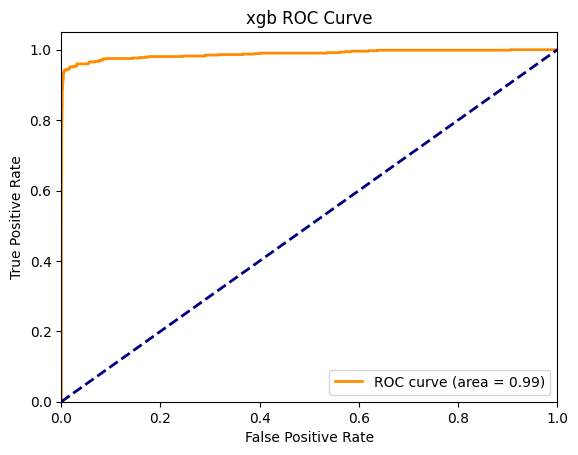

xgb
xgb: CV Mean: 0.9847980041453868 (+/- 0.021006823210705648)
Test F1 Score: 0.9893711064256188
Test Precision: 0.9893524494754818
Test Recall: 0.9893943266036289
0.9893943266036289
[LightGBM] [Info] Number of positive: 2846, number of negative: 28458
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003889 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1099
[LightGBM] [Info] Number of data points in the train set: 31304, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.090915 -> initscore=-2.302515
[LightGBM] [Info] Start training from score -2.302515
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

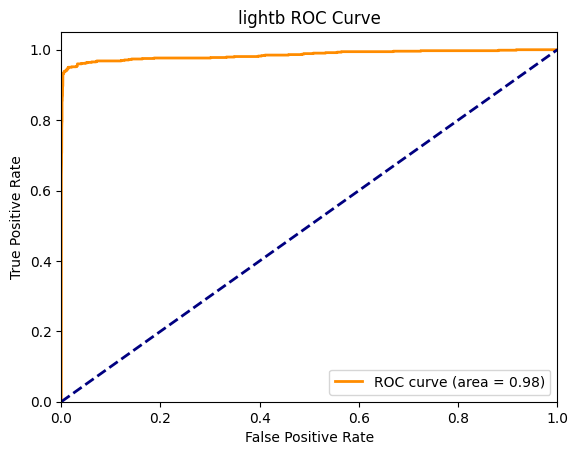

lightb
lightb: CV Mean: 0.9862412157707008 (+/- 0.01708482847418514)
Test F1 Score: 0.9895944186013528
Test Precision: 0.9895662339313648
Test Recall: 0.9896498849987222
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
0.9896498849987222


In [ ]:
results2 = model_test(classifiers2, X, y, param_grids2)

model_result = pd.DataFrame(results2).T
model_result.to_csv('models/result2.csv')

In [ ]:
results3 = model_test(classifiers3, X, y, param_grids3)

model_result = pd.DataFrame(results3).T
model_result.to_csv('models/result3.csv')

# 최적의 모델 선정 / 평가 


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lightb', LGBMClassifier(random_state=SEED))
])

# Grid Search    
param_grid = {
    'lightb__learning_rate': [0.1],
    'lightb__n_estimators': [100],
    'lightb__max_depth': [7]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_weighted')
grid_search.fit(X, y)

# best parameter
best_estimator = grid_search.best_estimator_

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)
sm = SMOTE(random_state=SEED)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)
best_estimator.fit(X_resampled, y_resampled)
y_pred = best_estimator.predict(X_test)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 2846, number of negative: 28458
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003116 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1099
[LightGBM] [Info] Number of data points in the train set: 31304, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.090915 -> initscore=-2.302515
[LightGBM] [Info] Start training from score -2.302515
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you di

edu_Academic degree: 0
employment_Student: 0
house_type_Office apartment: 3
employment_Pensioner: 3
house_type_Co-op apartment: 4
house_type_Rented apartment: 11
edu_Lower secondary: 14
house_type_Municipal apartment: 18
own_email_1: 22
house_type_With parents: 23
edu_Incomplete higher: 26
employment_State servant: 28
marry_Widow: 29
marry_Single / not married: 34
own_workphone_0: 37
own_email_0: 39
employment_Commercial associate: 40
marry_Separated: 41
own_house_N: 41
marry_Civil marriage: 43
own_car_Y: 46
children: 48
marry_Married: 50
gender_M: 51
house_type_House / apartment: 52
edu_Higher education: 53
own_workphone_1: 55
own_phone_1: 66
employment_Working: 70
gender_F: 76
own_phone_0: 76
own_house_Y: 86
own_car_N: 87
edu_Secondary / secondary special: 101
family: 166
employ_length: 384
inc: 430
age: 647


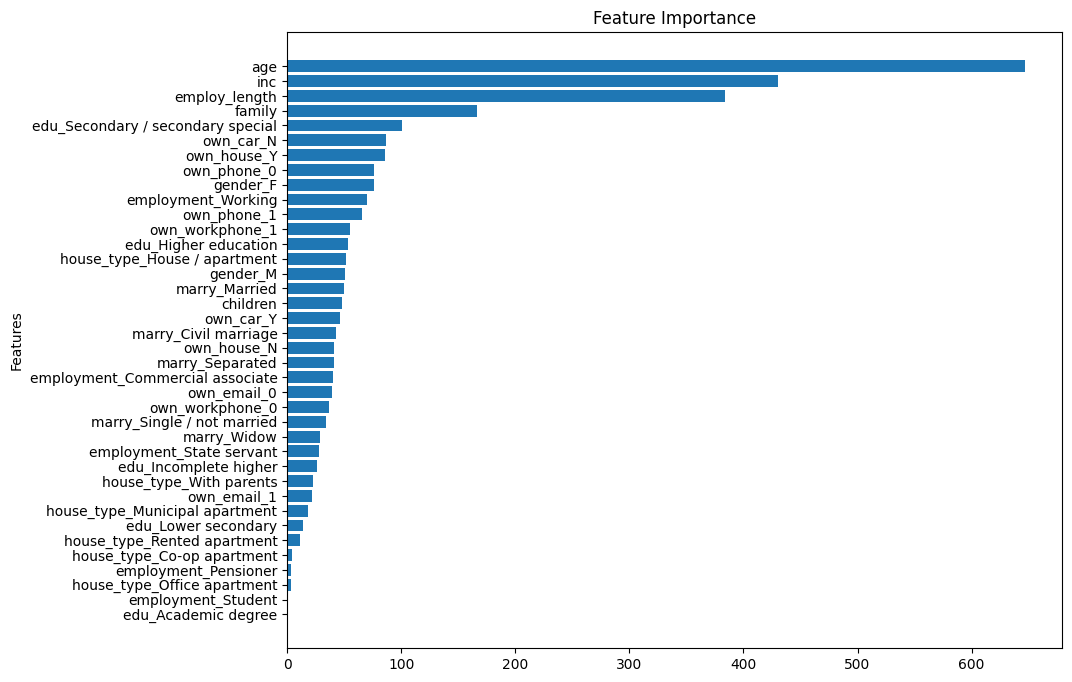

In [ ]:
import matplotlib.pyplot as plt

# 특성 중요도 추출
feature_importances = best_estimator.named_steps['lightb'].feature_importances_

# 특성 중요도를 특성 이름과 매핑
feature_names = X.columns  # X에는 사용된 특성들이 포함되어 있다고 가정합니다.

# 특성 중요도를 특성 이름과 매핑한 후, 중요도에 따라 내림차순으로 정렬
feature_importance_dict = dict(zip(feature_names, feature_importances))
sorted_feature_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1])

# 중요도가 높은 순으로 특성 이름과 중요도를 출력
for feature, importance in sorted_feature_importances:
    print(f"{feature}: {importance}")

# 특성 중요도를 시각화
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_feature_importances)), [importance for feature, importance in sorted_feature_importances], align='center')
plt.yticks(range(len(sorted_feature_importances)), [feature for feature, importance in sorted_feature_importances])

plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

employment_Working: 70
gender_F: 76
own_phone_0: 76
own_house_Y: 86
own_car_N: 87
edu_Secondary / secondary special: 101
family: 166
employ_length: 384
inc: 430
age: 647


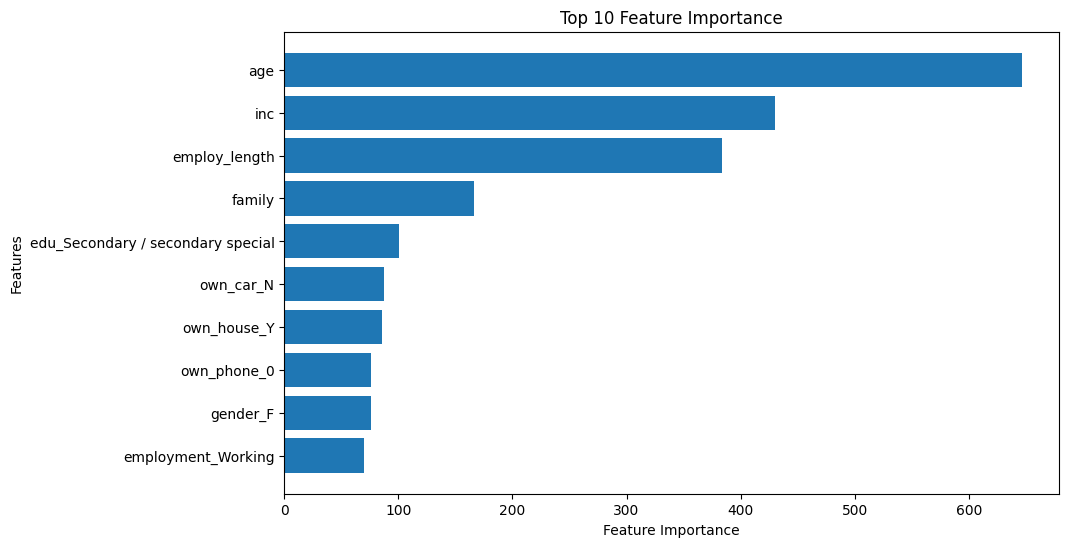

In [ ]:
import matplotlib.pyplot as plt

# 특성 중요도 추출
feature_importances = best_estimator.named_steps['lightb'].feature_importances_

# 특성 중요도를 특성 이름과 매핑
feature_names = X.columns  # X에는 사용된 특성들이 포함되어 있다고 가정합니다.

# 특성 중요도를 특성 이름과 매핑한 후, 중요도에 따라 내림차순으로 정렬
feature_importance_dict = dict(zip(feature_names, feature_importances))
sorted_feature_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1])

# 상위 10개의 특성만 선택
top_10_features = sorted_feature_importances[-10:]

# 상위 10개 특성 출력
for feature, importance in top_10_features:
    print(f"{feature}: {importance}")

# 상위 10개 특성 시각화
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_10_features)), [importance for feature, importance in top_10_features], align='center')
plt.yticks(range(len(top_10_features)), [feature for feature, importance in top_10_features])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 10 Feature Importance')
plt.show()

In [ ]:
# classifiers5 = {
#     'gaussian_naive_bayes': GaussianNB(),    
#     'gradient_boosting': GradientBoostingClassifier(random_state=SEED)
# }

# param_grids5= {
#     'gaussian_naive_bayes': {},
    
#     'gradient_boosting': {
#         'classifier__n_estimators': [100, 200, 300],
#         'classifier__learning_rate': [0.01, 0.1, 1.0],
#         'classifier__max_depth': [3, 5, 7],
#         'classifier__min_samples_split': [2, 5, 10]
#     }
#     } 